In [1]:
import os 
import sys
project_folder = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_folder)
from datasets.load20newsgroup import NewsGroupLoader

ModuleNotFoundError: No module named 'datasets'

In [2]:
dataloader=NewsGroupLoader()
train_df=dataloader.get_train_data()
test_df=dataloader.get_test_data()

In [3]:
X_train=train_df["text"]
y_train=train_df["label"]

X_test=test_df["text"]
y_test=test_df["label"]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [5]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [6]:
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [7]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)  # max_depth limits tree depth
dt_classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [8]:
y_pred = dt_classifier.predict(X_test_tfidf)

In [9]:
# 4. Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.22568093385214008

Confusion Matrix:
[[ 17   0   0   0   0   0   0   0   0   0   0   0   0 183   1  40   0   1
    0   2]
 [  0   4  14   0   4   1   0   0   0   0   4   0   0 271   7   2   0   0
    0   0]
 [  0  11 121   0   0   4   4   0   0   0   0   0   0 145   2   0   0   0
    0   0]
 [  0   1  19   4   2   1   4   2   0   0   4   0   0 261   2   0   0   0
    0   0]
 [  0   1   1   1  54   1   2   0   0   0   3   0   0 199   0   3   0   0
    0   0]
 [  0   1  22   1   1  18   1   0   0   0   0   0   0 250   2   0   0   0
    0   0]
 [  2   0   3   2   3   1 105   6   3   0   6   0   0 170   2   1   0   0
    0   0]
 [  0   0   2   1   0   0   2 106   3   0   1   0   0 184   0   4   1   0
    0   0]
 [  0   0   2   0   0   0   2   9  83   0   0   0   0 194   0   4   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0   9  61   0   0 225   0   2   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  96   0   0 184   0   3   0   0
    0   1]
 [  3   2 

/home/deadshot/miniconda3/envs/mlenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deadshot/miniconda3/envs/mlenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deadshot/miniconda3/envs/mlenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

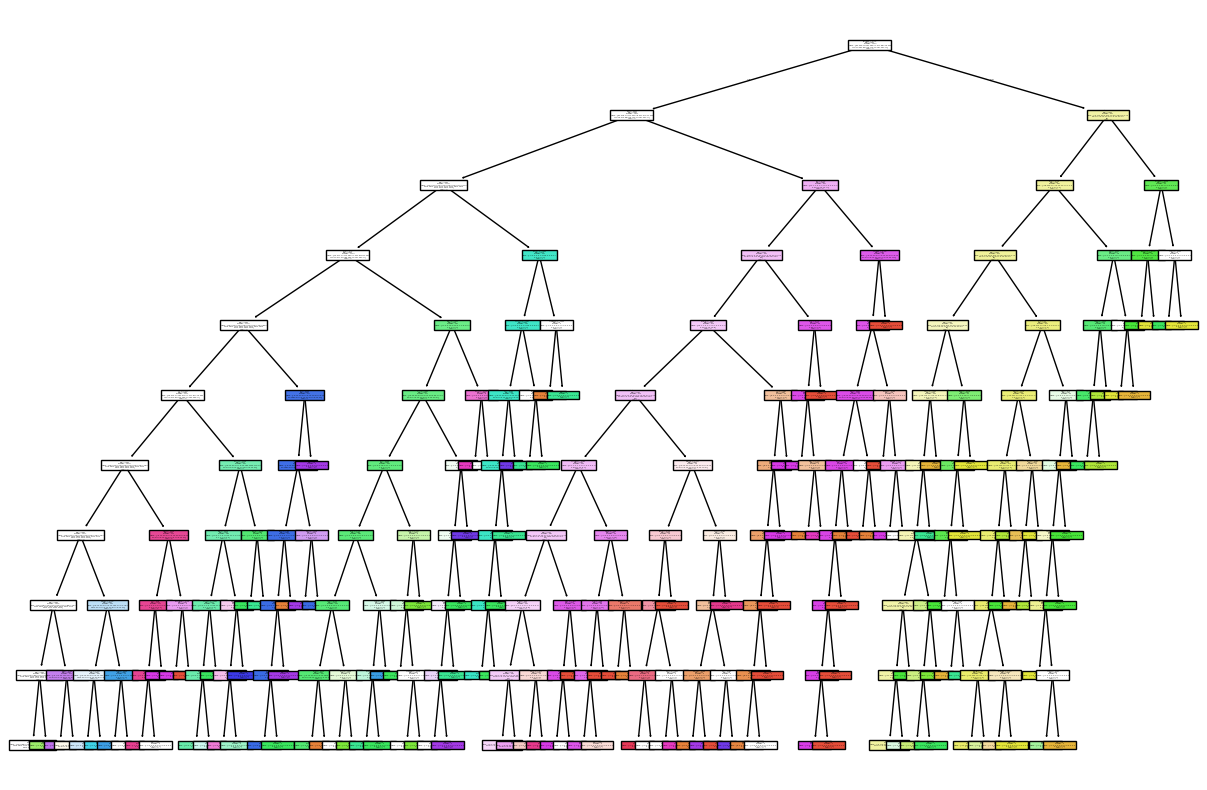

In [16]:
plt.figure(figsize=(15,10))
class_names = [str(label) for label in y_test.unique()]
plot_tree(dt_classifier,
          feature_names=tfidf_vectorizer.get_feature_names_out(), 
          class_names=class_names, 
          filled=True)
plt.show()

#### Hyper parameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV


In [12]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [13]:
dt = DecisionTreeClassifier(random_state=42)

# Grid search for best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_dt = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_dt.predict(X_test_tfidf)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Model Accuracy: 0.4290767598160594
